<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/gluocsePlot1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading data

In [ ]:
from pandas import read_csv
file_path = file_path = 'drive/My Drive/Dataset/GlucoseLong02_02April.csv'
dataset = read_csv(file_path,
                   
                   parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   index_col=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   skiprows= [i for i in range(1,11)],
                   na_values= ['nan'])

In [ ]:
dataset.head()

,Index,Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
Timestamp (YYYY-MM-DDThh:mm:ss),,,,,,,,,,,,,
2021-03-21 12:00:26,11,EGV,NaN,NaN,NaN,PG00804102,126.0,NaN,NaN,NaN,NaN,7573.0,8M8XCT
2021-03-21 12:05:26,12,EGV,NaN,NaN,NaN,PG00804102,123.0,NaN,NaN,NaN,NaN,7873.0,8M8XCT
2021-03-21 12:10:26,13,EGV,NaN,NaN,NaN,PG00804102,123.0,NaN,NaN,NaN,NaN,8173.0,8M8XCT
2021-03-21 12:15:26,14,EGV,NaN,NaN,NaN,PG00804102,122.0,NaN,NaN,NaN,NaN,8473.0,8M8XCT
2021-03-21 12:20:27,15,EGV,NaN,NaN,NaN,PG00804102,118.0,NaN,NaN,NaN,NaN,8773.0,8M8XCT


In [ ]:
dataset['Glucose Value (mg/dL)'][0]

126.0

In [ ]:
dataset.describe  

<bound method NDFrame.describe of                                  Index  ... Transmitter ID
Timestamp (YYYY-MM-DDThh:mm:ss)         ...               
2021-03-21 12:00:26                 11  ...         8M8XCT
2021-03-21 12:05:26                 12  ...         8M8XCT
2021-03-21 12:10:26                 13  ...         8M8XCT
2021-03-21 12:15:26                 14  ...         8M8XCT
2021-03-21 12:20:27                 15  ...         8M8XCT
...                                ...  ...            ...
2021-04-02 18:29:41               3523  ...         8M8XCT
2021-04-02 18:34:40               3524  ...         8M8XCT
2021-04-02 18:39:40               3525  ...         8M8XCT
2021-04-02 18:44:40               3526  ...         8M8XCT
2021-04-02 18:49:42               3527  ...         8M8XCT

[3517 rows x 13 columns]>

In [ ]:
dataset['Glucose Value (mg/dL)'].describe()

count    3510.000000
mean      123.586040
std        19.776736
min        45.000000
25%       109.000000
50%       119.000000
75%       136.000000
max       225.000000
Name: Glucose Value (mg/dL), dtype: float64

In [ ]:
len(dataset)

3517

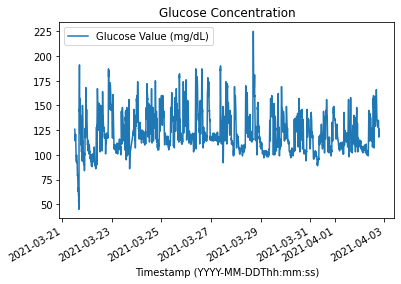

In [ ]:
import matplotlib.pyplot as plt
dataset.plot(y='Glucose Value (mg/dL)', title='Glucose Concentration')
plt.show()

###Function to find index in time series

In [ ]:
import numpy
def find_index(dataset, time):
   s = [index for index in range(len(dataset.index.values)) if dataset.index.values[index] == numpy.datetime64(time)]
   return s[0]

In [ ]:

(dataset.index.values[0]) == numpy.datetime64('2021-03-21T12:00:26')

True

In [ ]:
x_start = find_index(dataset, '2021-04-02T15:09:40')
x_stop = find_index(dataset, '2021-04-02T17:19:40')

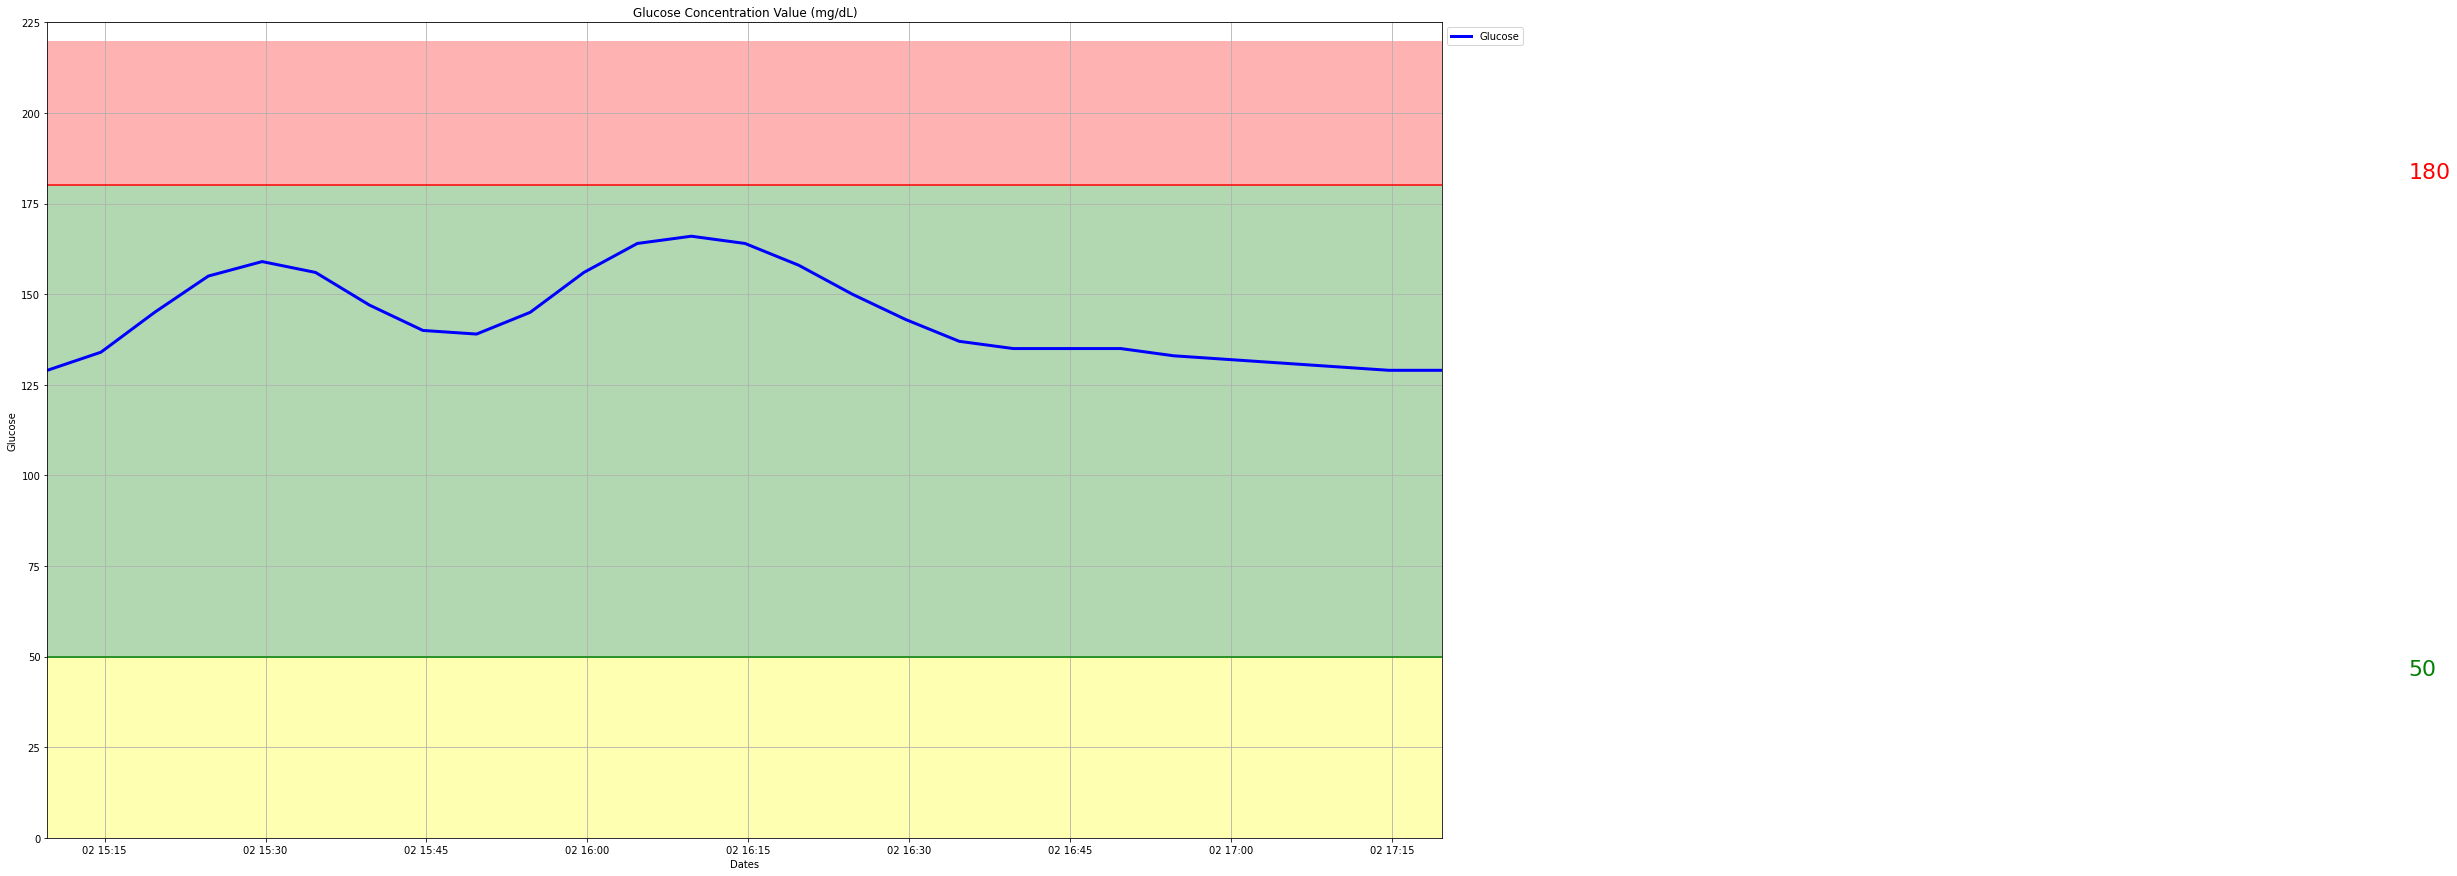

In [ ]:
fig, ax = plt.subplots(1, figsize=(25,15))
plt.rc('grid', linestyle=':', color='b', linewidth=2)
ax.plot(dataset.index.values,
           dataset['Glucose Value (mg/dL)'], 'b',linewidth=3)
ax.margins(0) # remove default margins (matplotlib verision 2+)
ax.axhline(y =50, color = 'green')
ax.axhline(y =180, color = 'red')
ax.axhspan(0, 50, facecolor='yellow', alpha=0.3)
ax.axhspan(50, 180, facecolor='green', alpha=0.3)
ax.axhspan(180, 220, facecolor='red', alpha=0.3)
#ax.grid(axis = 'x', axis='y')
ax.grid(True)

#ax.legend(["Glucose"]) 
ax.legend(["Glucose"], bbox_to_anchor = (1 , 1))
# Add title and axis names
plt.title('Glucose Concentration Value (mg/dL)')
plt.xlabel('Dates')
plt.ylabel('Glucose')
# Add number as a marker
plt.text(dataset.index.values[-1], 182, "180", color="red", fontsize=22)
plt.text(dataset.index.values[-1], 45, "50", color="green", fontsize=22)
#plt.yablel('Glucose Concentration Value (mg/dL)') 

plt.xlim([dataset.index.values[x_start], dataset.index.values[x_stop]])
plt.show()

In [ ]:
dataset.index.values

In [ ]:
find_index(dataset,'2021-03-24T19:47:00.000000000' )

237

In [ ]:
len(dataset.index.values)

239